<a href="https://colab.research.google.com/github/RishabhSingh01411/Capstone-Project---ML---Regression---Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Capstone_Project_Regression_Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Submitted By**    - Rishabh Singh

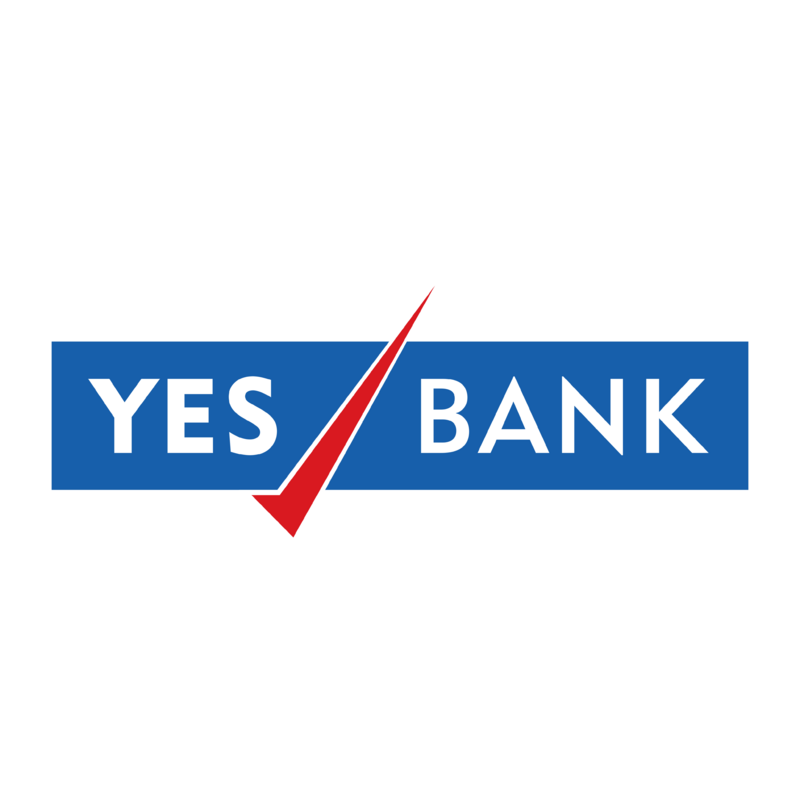

# **Project Summary -**



**Project Summary: Forecasting Yes Bank's Monthly Stock Closing Prices Amidst Turbulence**

This project focuses on predicting the monthly closing price of Yes Bank's stock, a crucial task for investors, stakeholders, and market participants given the bank's prominent position in India's financial sector. Yes Bank has faced significant challenges since 2018, notably the involvement of its co-founder, Rana Kapoor, in a fraud case. This situation, coupled with the bank's issues related to bad loans, has led to regulatory interventions by the Reserve Bank of India, making stock price prediction complex and uncertain.

To address this challenge, we leveraged a comprehensive dataset containing monthly stock price data from the bank's inception. This dataset provides essential metrics, including the monthly closing, opening, highest, and lowest stock prices. Our primary objective was to develop predictive models capable of capturing the intricate dynamics and trends in Yes Bank's stock prices, especially in light of the turbulent events and uncertainties affecting the bank's performance.

We explored various modeling techniques, focusing on time series models and regression methods, to evaluate their effectiveness in forecasting Yes Bank's stock closing prices. These models were specifically assessed on their ability to incorporate the impact of significant events, such as the fraud case involving Rana Kapoor and regulatory interventions by the Reserve Bank of India.

Successfully predicting Yes Bank's stock closing price could offer valuable insights for stakeholders, assisting them in making informed investment decisions. By navigating the complexities and uncertainties surrounding Yes Bank's stock prices, this project aims to enhance understanding of the bank's financial performance and contribute to more effective decision-making in the future.

# **GitHub Link -**

https://github.com/RishabhSingh01411/Capstone-Project---ML---Regression---Yes-Bank-Stock-Closing-Price-Prediction

# **Problem Statement**






**Project Problem Statement: Predicting Yes Bank's Stock Closing Price**

The goal of this project is to create a reliable model that accurately predicts the closing price of Yes Bank's stock. We face challenges like understanding the stock's complex trends, especially after 2018, when its price saw a sudden decline. Multicollinearity, where independent variables are highly correlated, is another challenge. The model needs to handle this to ensure accurate predictions.

Additionally, significant events like fraud cases involving the bank's founders and regulatory interventions can impact the stock prices. Our model should capture these effects accurately.

We aim for high accuracy in forecasting the stock's closing price, with the K-Nearest Neighbors (KNN) Regression model's 99% accuracy as our benchmark. Achieving this accuracy will provide valuable insights for investors and stakeholders, helping them make informed decisions about Yes Bank's stock.

In summary, our project aims to build a predictive model that navigates the complexities of forecasting Yes Bank's stock prices. The goal is to provide stakeholders with a reliable tool for understanding the stock's future performance and supporting their investment decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Basic libraries
import numpy as np
import pandas as pd
from datetime import datetime

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Library to avoid warnings
import warnings
warnings.filterwarnings("ignore")

# ML Libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Dataset Loading

In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset

data = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look

data.head(10)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

rows, columns = data.shape
print(f"Rows: {rows}, Columns: {columns}")


### Dataset Information

In [ ]:
# Dataset Info

data.info()


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

total_duplicates = data.duplicated().sum()

print(f"Total number of duplicate rows in the dataset: {total_duplicates}")


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

missing_values_count = data.isnull().sum()

print("Missing Values/Null Values Count:")
print(missing_values_count)


In [ ]:
# Visualizing the missing values

missing_data = data.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?


1. **Dataset Overview**:
   - The dataset contains information about Yes Bank's stock prices.
   - It comprises 185 entries (rows) and 5 columns.
   - Each row represents monthly stock data, including the date, opening price, highest price, lowest price, and closing price.

2. **Duplicate Values**:
   - There are no duplicate rows present in the dataset, indicating that each entry is unique.

3. **Missing Values**:
   - There are no missing or null values present in any of the columns.

In summary, the dataset consists of complete and unique monthly stock price data for Yes Bank, including information on opening, highest, lowest, and closing prices. There are no issues with duplicates or missing values, making the dataset suitable for analysis and modeling.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

dataset_columns = data.columns

print("Dataset Columns:")
dataset_columns


In [ ]:
# Dataset Describe

dataset_description = data.describe()

print("Dataset Descriptive Statistics:")
print(dataset_description)


### Variables Description


The dataset consists of five columns:

1. **Date**: This column represents the date of the stock data entry.
2. **Open**: This column indicates the opening price of Yes Bank's stock for each respective date.
3. **High**: This column displays the highest price reached by Yes Bank's stock during the respective date.
4. **Low**: This column shows the lowest price recorded for Yes Bank's stock on the given date.
5. **Close**: This column denotes the closing price of Yes Bank's stock for each specific date.

Descriptive statistics provide insights into the distribution and central tendencies of the numerical columns:

- **Open**: The average opening price is approximately 105.54, with prices ranging from a minimum of 10 to a maximum of 369.95.
- **High**: The average highest price is around 116.10, with values varying between 11.24 (minimum) and 404.00 (maximum).
- **Low**: The average lowest price stands at about 94.95, with the lowest and highest values being 5.55 and 345.50, respectively.
- **Close**: The average closing price is roughly 105.20. The closing prices vary between a minimum of 9.98 and a maximum of 367.90.

These descriptive statistics provide a comprehensive overview of the Yes Bank stock prices' distribution and variability over the dataset's timeframe.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

unique_values_count = data.nunique()

print("Total number of unique values for each variable:")
print(unique_values_count)


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%b-%y')

# Format dates to include full year with shortened month name
data['Date'] = data['Date'].dt.strftime('%b-%Y')

# Convert 'Date' column back to datetime datatype
data['Date'] = pd.to_datetime(data['Date'], format='%b-%Y')

# Check the updated data types and first few rows
print('Data type of \'Date\' column:', data['Date'].dtype)
print(data['Date'].head())

In [ ]:
# Create 'Month' column to store short month names
data['Month'] = data['Date'].dt.strftime('%b')

# Display the first few rows of the updated DataFrame
print(data.head())

### What all manipulations have you done and insights you found?

* First, we change the 'Date' column's datatype to "Datetime". Then, we create a new column named 'Month' where we store the month names in string format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Yes Bank's Yearly Average Stock Closing Prices

In [ ]:
# Chart - 1. visualization code

# Extract year from 'Date' column
data['Year'] = data['Date'].dt.year

# Group data by 'Year' and calculate average closing price
yearly_data = data.groupby('Year')['Close'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(yearly_data['Year'], yearly_data['Close'], marker='o', linestyle='-')
plt.title('Yearly Average Closing Stock Prices')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.grid(True)

# Set x-axis ticks to display all years from 2005
plt.xticks(yearly_data['Year'])  # Set x-axis ticks to yearly_data['Year']

# Annotate each data point
for i, txt in enumerate(yearly_data['Close']):
    plt.annotate(f"{txt:.2f}", (yearly_data['Year'].iloc[i], yearly_data['Close'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* The specific chart, a line plot of yearly average closing stock prices, was chosen because it effectively visualizes the annual trends in stock performance. This chart allows for easy identification of patterns, such as increases or decreases in average stock prices over the years. Additionally, annotating each data point with the average closing price provides specific information at a glance, making it easier to understand and interpret the yearly stock price trends for the given dataset.

##### 2. What is/are the insight(s) found from the chart?

* From the above line chart, we can clearly see that after the listing of Yes Bank's stocks in the stock market in 2005, its stock price increased consistently with some ups and downs. The first significant price drop occurred in 2008 when the average price was ₹28.25. The price saw a minimalistic increase in 2009, reaching ₹30.03. However, it fell again in 2011 to ₹57.22 from an average of ₹58.65 in 2010.

 From 2011 onwards, the stock price began to rise steadily, reaching its all-time high average price of ₹315.31 in 2017. However, after 2017, the price dropped drastically, closing at an average of ₹22.11 in 2020. This sharp decline was primarily due to the 2018 scam involving Yes Bank.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* **Positive Business Impact:**
Understanding the consistent growth of Yes Bank's stock price from 2005 to 2017 can instill confidence among investors about the bank's potential for growth and profitability. It shows that, despite some fluctuations, the bank has the capability to recover and reach new heights.

* **Negative Growth Insights:**
The drastic drop in the stock price after 2017, especially the sharp decline to ₹22.11 in 2020, raises concerns. This significant decrease is directly linked to the 2018 scam involving Yes Bank. Such negative events can erode investor trust and confidence in the bank's management and operations, potentially leading to reduced investments and a decline in the bank's market value.

 In summary, while the historical data indicates periods of growth and stability for Yes Bank, the recent decline underscores the importance of addressing and mitigating the impact of negative events, like scams, to maintain investor trust and ensure sustained business growth.

#### Chart - 2 - Yes Bank's Stock Price Movements by Year and Month

In [ ]:
# Chart - 2. visualization code

# Create a combined Candlestick chart for all years
fig = go.Figure(go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close']))

# Update layout
fig.update_layout(title={'text': 'Yes Bank\'s Stock Price Movements by Year and Month', 'x': 0.5, 'y': 0.95},
                  xaxis_title='Date',
                  yaxis_title='Price',
                  width=1380,
                  height=930,
                  plot_bgcolor='rgb(240, 240, 240)',
                  paper_bgcolor='rgb(240, 240, 240)'
)

# Show plot
fig.show()


##### 1. Why did you pick the specific chart?

* The specific chart, a combined Candlestick chart, was chosen to visualize the stock price movements of Yes Bank over multiple years. This type of chart efficiently displays the open, high, low, and close prices of the stock, allowing for a comprehensive understanding of price fluctuations and trends over time.

##### 2. What is/are the insight(s) found from the chart?

When Yes Bank was listed in the share market in July 2005, their stock prices were:

Open: ₹13  
High: ₹14  
Low: ₹11.25  
Close: ₹12.46  

These prices increased consistently until January 2008, reaching:

Open: ₹49.99  
High: ₹55.56  
Low: ₹30.24  
Close: ₹50.54  

This marked the first and highest positive increase in stock prices. After this, there were fluctuations in stock prices, but the last significant positive increase was observed in July 2018, with:

Open: ₹340  
High: ₹393.35  
Low: ₹332.45  
Close: ₹367.9  

However, after this peak in 2018, Yes Bank's stock prices began to decline steadily due to the 2018 Yes Bank scam.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* **Positive Impact:**  
Yes, the data reveals that Yes Bank's stock had significant positive growth from its listing in 2005 to January 2008 and another notable increase in July 2018. Understanding these growth periods can help businesses identify factors or strategies that contributed to this growth, potentially replicating them for positive business impact.

* **Negative Impact:**  
The data also highlights a decline in Yes Bank's stock prices after the 2018 peak, attributed to the 2018 Yes Bank scam. This decline can serve as a cautionary insight for businesses, emphasizing the importance of maintaining transparency, trust, and ethical practices to sustain stock prices and avoid negative growth.

#### Chart - 3 - Distribution of stock prices with their frequency of each variable

In [ ]:
# Chart - 3 visualization code


variables = ['Open', 'High', 'Low', 'Close']

# Define colors for each variable
colors = ['blue', 'green', 'red', 'purple']

# Set the figure size and style
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Iterate through each variable to plot histogram and KDE
for var, color in zip(variables, colors):
    plt.subplot(2, 2, variables.index(var) + 1)
    sns.histplot(data[var], kde=True, bins=30, color=color, edgecolor='black')
    plt.title(f'Distribution of {var} Stock Prices')
    plt.xlabel(f'{var} Stock Price (₹)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* The specific chart was chosen to visualize the distribution of different stock price variables (Open, High, Low, Close) using histograms and Kernel Density Estimation (KDE). This allows for a clear comparison of the frequency distribution of each variable, helping to understand their overall patterns and variability.

##### 2. What is/are the insight(s) found from the chart?

* The distribution of stock prices for each variable shows similarities. Most stocks have a similar number of prices ranging between 0 to 100 in the variables Open, High, Low, and Close. From this, we can conclude that the majority of stocks are skewed towards or lie within the price range of 0 to 100 Rs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insights about the positively skewed distributions of open, high, low, and close prices can have a positive business impact by informing strategic decision-making and identifying potential buying opportunities. However, it is important to note that positive skewness does not directly imply negative growth. Negative growth would require a comprehensive analysis considering various factors beyond skewness, such as trends, market conditions, and external influences. Therefore, it is not justified to conclude specific insights leading to negative growth based solely on the skewness of the distributions. Further analysis is needed to assess any potential negative impacts on business growth.

#### Chart - 4 - Identifying outliers

In [ ]:
# Chart - 4 visualization code

# Define the variables to visualize
variables = ['Open', 'High', 'Low', 'Close']

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create boxplot for each variable
sns.boxplot(data=data[variables], palette="Set2")
plt.title('Boxplot of Stock Prices')
plt.ylabel('Price (₹)')
plt.xlabel('Variables')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* The specific chart chosen here is a boxplot. A boxplot is selected because it provides a concise visual summary of the distribution of numerical data across multiple variables. It allows us to quickly compare the distribution of stock prices (open, high, low, close) in a single plot. The boxplot shows the median, quartiles, and any outliers present in the data, making it easy to identify any variability or skewness in the stock price data across different variables. Overall, it offers a clear and compact representation of the central tendency and spread of the stock prices, aiding in effective data exploration and analysis.

##### 2. What is/are the insight(s) found from the chart?

* As we can see in the above chart, there are some larger values considered as outliers in the dataset. However, we can't remove them because they are important for our analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from identifying outliers can indeed help create a positive business impact. By understanding the presence and significance of these outliers, businesses can make more informed decisions and develop strategies that account for extreme values in their data. This can lead to better risk management, improved forecasting accuracy, and enhanced understanding of market trends.

 However, the presence of outliers may also indicate potential areas of concern or negative growth. For example, if outliers represent unusually high or low sales figures, they could indicate irregularities in sales patterns or the presence of anomalies that require further investigation. Addressing these insights appropriately can help mitigate risks and ensure the overall health and stability of the business.

#### Chart - 5 - Correlation between the bivariate variables

In [ ]:
# Chart - 5 visualization code

numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Function to create scatter plot for a single variable against 'Close'
def create_scatter_plot(var, df):
    plt.figure(figsize=(12, 8))

    # Create scatter plot
    sns.scatterplot(x=var, y='Close', data=df, label=f'{var} vs Close', alpha=0.7)

    plt.xlabel(var)
    plt.ylabel('Close')
    plt.title(f"{var} Vs. Close", fontsize=16)

    # Fit a linear regression line to the data
    z = np.polyfit(df[var], df['Close'], 1)
    y_hat = np.poly1d(z)(df[var])

    plt.plot(df[var], y_hat, "r", lw=1)

    # Add grid lines with transparency
    plt.grid(alpha=0.3)
    plt.xticks(np.arange(min(df[var]), max(df[var]), 100))
    plt.yticks(np.arange(min(df['Close']), max(df['Close']), 10))

    # Display correlation score at the middle top of the chart
    correlation = df[var].corr(df['Close'])
    plt.text(0.5, 0.95, f'Correlation: {round(correlation, 2)}', transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='center', horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    plt.show()

# Create scatter plots for each variable
variables = ['Open', 'High', 'Low']

for var in variables:
    create_scatter_plot(var, data)

##### 1. Why did you pick the specific chart?

* The scatter plots were chosen to visually show the relationship between each stock price metric ('Open', 'High', 'Low') and the closing price ('Close'). By plotting these variables against each other, we can easily see how changes in one metric might be associated with changes in the closing price. The added regression line and correlation score help to highlight the strength and direction of this relationship.

##### 2. What is/are the insight(s) found from the chart?

* After reviewing the scatter plots with the best fit line, it's clear that all the independent variables—Open, High, and Low—exhibit a linear relationship with the dependent variable, Close. This means that when Open, High, or Low values change, the Close price tends to change proportionally in a predictable manner.

 This discovery is crucial for data analysis and modeling. It implies that we can use the values of Open, High, and Low to make predictions about the Close price accurately. Understanding this relationship helps us build reliable models and gain insights into how changes in these variables affect the Close price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Identifying linear relationships between independent variables like Open, High, and Low, and the dependent variable Close in stock market analysis has big business impacts:

1. **Better Predictions**: We can use these relationships to predict future Close prices, helping investors make smarter investment choices.

2. **Understanding Risk**: Knowing how changes in these variables affect Close prices helps assess and manage investment risks effectively.

3. **Choosing Key Factors**: By spotting which variables influence Close prices the most, we can focus on them for better analysis and decision-making.

4. **Developing Strategies**: Understanding these relationships can lead to creating trading strategies, spotting trends, and making more informed investment moves.

 Overall, recognizing and grasping these linear relationships gives businesses and investors valuable insights into stock price dynamics, leading to better forecasting, risk management, and decision-making in financial markets.

#### Chart - 6 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

* The heatmap was chosen because it's an effective way to visualize correlations between different variables in a dataset. With colors representing correlation values, it's easy to spot which variables are positively or negatively related to each other. This helps in understanding how changes in one variable might affect another, providing valuable insights for analysis and decision-making.

##### 2. What is/are the insight(s) found from the chart?

* From the heatmap, we can see that variables like 'Open', 'High', and 'Low' have a strong correlation with the 'Close' variable, with values of 0.98, 0.99, and 1 respectively. This indicates that a small change in these variables will also significantly affect the 'Close' variable. On the other hand, the 'Year' variable doesn't show a strong correlation with these variables, having a correlation of around 0.6. This suggests that changes in these price variables won't greatly impact the 'Year', and vice versa.

#### Chart - 7 - Pair Plot

In [ ]:
# Pair Plot visualization code

# Selecting relevant columns for the pair plot
selected_columns = ['Open', 'High', 'Low', 'Close']

# Create pair plot
sns.pairplot(data[selected_columns])
plt.show()

##### 1. Why did you pick the specific chart?

* The pair plot is chosen because it provides a quick visual overview of the relationships between multiple pairs of variables. By plotting all selected columns against each other, we can easily spot patterns, trends, and correlations between the stock prices (Open, High, Low, Close). This helps in understanding how these variables relate to one another and if there are any evident relationships or patterns between them.

##### 2. What is/are the insight(s) found from the chart?

* The opening, highest, and lowest prices of the stock show a strong connection with its closing price. This means that when one of these prices goes up or down, it often affects the closing price in a similar way. Also, these three prices are closely related to each other, indicating they tend to move together and follow similar patterns.

 These relationships give us useful insights into understanding how Yes Bank's stock behaves. They can help us predict what the closing price might be based on the opening, highest, and lowest prices. Knowing these connections helps us make better decisions and spot trends for predicting future stock prices. However, it's essential to remember that just because two things are correlated doesn't mean one causes the other. So, it's crucial to consider other factors too when analyzing the stock market.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

data.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

* As we can see, our dataset has no missing values. Therefore, we don't need any kind of missing value treatment technique.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# Apply log transformation to 'Open', 'High', 'Low', 'Close' columns
for col in ['Open', 'High', 'Low', 'Close']:
    data[col] = np.log1p(data[col])

# Set the style for the seaborn library
sns.set(style="whitegrid")

# Define colors for each variable
colors = ['blue', 'green', 'red', 'purple']

# Visualize the transformed data distribution using boxplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[col], color=colors[i-1], width=0.3)
    plt.title(f'Boxplot of {col} (After Log Transformation)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Our dataset contains some larger values that can't be removed because they are important data points in our dataset. Therefore, we use log transformation to handle the outliers. After this transformation, we create a boxplot to show that no outliers remain outside the whiskers.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

* Our dataset only has numerical data, so we don't need to worry about converting categorical variables into numbers for analysis or modeling.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Select numerical columns
numerical_cols = ['Open', 'High', 'Low','Close']
data_numerical = data[numerical_cols]

# Standardize the features
scaler = StandardScaler()
data_numerical_scaled = scaler.fit_transform(data_numerical)

# Create an empty dataframe to store the VIF for each feature
vif_df = pd.DataFrame()

# Assign the feature names to the 'Features' column
vif_df['Features'] = numerical_cols

# Calculate the VIF for each feature and store it in the 'VIF' column
vif_df['VIF'] = [variance_inflation_factor(data_numerical_scaled, i) for i in range(len(data_numerical.columns))]

# Display the dataframe containing the features and their corresponding VIF values
print(vif_df)


* The VIF values for all the features suggest strong multicollinearity. However, since our dataset is small and contains only four numerical independent variables, there's limited room for beneficial feature manipulation. Additionally, without categorical variables, our options for feature engineering or transformation are limited. Therefore, we should focus on exploring alternative modeling approaches or collecting more data to mitigate the issue of multicollinearity.

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

* Here, we didn't use any feature selection methods because our dataset is already small, containing a limited number of variables. Therefore, we used all these variables as they are, considering them as our features.

##### Which all features you found important and why?

* In our analysis, all features (Open, High, Low, Close) were considered important because they represent key metrics of stock prices. Each feature provides valuable information about the stock's performance, such as the opening price, highest price, lowest price, and closing price for a given period. These features collectively contribute to understanding the overall trend and behavior of the stock market, making them essential for analysis and modeling.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

# Apply log transformation to the numerical columns
data_log_transformed = np.log1p(data[numerical_cols])

# Visualize the transformed data distributions
plt.figure(figsize=(15, 10))

# Define dark colors
dark_colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange']

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_log_transformed[col], bins=20, kde=True, color=dark_colors[i - 1])
    plt.title(f'Distribution of {col} (After Log Transformation)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

 Yes, the data needed to be transformed. We applied a log transformation to the numerical columns (Open, High, Low, Close).

 **Log Transformation Definition:**  
Log transformation is a mathematical operation that applies the natural logarithm function to each data point. It is used to stabilize the variance across the data, make skewed data more symmetric, and reduce the impact of outliers.

 **Why we used log transformation:**
- Log transformation helps to stabilize the variance across the data and reduce the impact of outliers.
- It makes the data more symmetric and conform closer to a normal distribution, which can improve the performance of certain statistical and machine learning models.
- Log transformation also ensures that small changes in the original data correspond to similar changes in the transformed data, which can be beneficial in certain analysis scenarios.

Overall, log transformation helped to address potential issues like skewed distributions and variability in the data, making it more suitable for analysis and modeling purposes.

### 6. Data Scaling

In [ ]:
# Scaling your data

# Select numerical columns
numerical_cols = ['Open', 'High', 'Low', 'Close']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical data
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the first few rows of the scaled data
print(data[numerical_cols].head())

##### Which method have you used to scale you data and why?

* **Standard Scaler Definition:**  
StandardScaler is a method used for standardizing features by removing the mean and scaling to unit variance. This means it transforms the data so that it has a mean of 0 and a standard deviation of 1.

 **Why We Used Standard Scaler:**  
We used StandardScaler to bring all the numerical features (Open, High, Low, Close) to a similar scale. This helps in ensuring that all features contribute equally to the model training and prevents features with larger scales from dominating the learning process. Standardizing the data also improves the performance of certain machine learning algorithms and helps in achieving faster convergence during model training.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

* As we know, our dataset is not very large and has a limited number of variables. Therefore, we don't need any kind of dimensionality reduction here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Define independent and dependent variables
independent_variables = ['Open', 'High', 'Low']
dependent_variable = 'Close'

# Assign the independent and dependent variables to X and y, respectively
X = data[independent_variables]
y = data[dependent_variable]

# Split the data into training and testing datasets using a test size of 0.2 (20%)
# Set random_state to 0 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the shape of the train and test sets
print("X_train:\n", X_train.head())
print("\nX_test:\n", X_test.head())
print("\ny_train:\n", y_train.head())
print("\ny_test:\n", y_test.head())


##### What data splitting ratio have you used and why?

We used a data splitting ratio of 80:20, meaning 80% of the data is used for training the model and 20% for testing.

**Reason for the 80:20 Ratio:**  
We chose this ratio because it strikes a balance between having enough data for training the model effectively and having enough data for testing to evaluate the model's performance accurately. This ratio helps prevent overfitting while ensuring that the model has sufficient data to learn patterns and relationships from the training set. Additionally, a larger training set often leads to more robust and generalizable models, which is why we allocated the majority of the data (80%) for training purposes.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

* There is no need to balance the dataset.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression

* Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. In simpler terms, it helps us understand how the value of the dependent variable changes with the change in one or more independent variables. The goal is to find the best-fitting straight line (or hyperplane in higher dimensions) that predicts the dependent variable based on the independent variable(s).

In [ ]:
# ML Model - 1 Linear Regression Implementation :-

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the Algorithm :-

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the model :-

# Predict on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MAE: ", train_mae)
print("Testing MAE: ", test_mae)
print("\nTraining MSE: ", train_mse)
print("Testing MSE: ", test_mse)
print("\nTraining R-squared: ", train_r2)
print("Testing R-squared: ", test_r2)

# Print the predicted values
print("\nPredicted values for y_test:\n", y_test_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Evaluation metric names
metrics = ['MAE', 'MSE', 'R-squared']
training_scores = [train_mae, train_mse, train_r2]
testing_scores = [test_mae, test_mse, test_r2]

# Number of metrics
num_metrics = len(metrics)

# Set width of bar
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(num_metrics)
r2 = [x + bar_width for x in r1]

# Create bar chart
plt.figure(figsize=(10, 6))
bars1 = plt.bar(r1, training_scores, color='blue', width=bar_width, edgecolor='grey', label='Training')
bars2 = plt.bar(r2, testing_scores, color='orange', width=bar_width, edgecolor='grey', label='Testing')

# Add annotations to the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(num_metrics)], metrics)
plt.title('Evaluation Metric Scores Comparison (Training vs Testing)')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()



In [ ]:
plt.figure(figsize=(10, 6))

# Plot the actual Close prices from the test data
plt.plot(y_test.values, color='blue')

model.fit(X_train, y_train)

lr_grid_pred = model.predict(X_test)

# Plot the predicted Close prices from the Linear Regression model
plt.plot(lr_grid_pred, color='red')

# Set the label for the y-axis
plt.ylabel("Close Price")

# Add a legend to differentiate between the actual and predicted values
plt.legend(["Actual", "Predicted"])

# Set the title of the plot
plt.title("Linear Regression")

# Add gridlines
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.) :-

# Define the hyperparameters grid
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False]
}

# Instantiate the GridSearchCV object
lr_grid = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the Algorithm :-

# Fit the grid search to the data
lr_grid.fit(X_train, y_train)

# Get the best model and its parameters
best_lr = lr_grid.best_estimator_
best_params = lr_grid.best_params_

# Predict on the model :-

# Predict using the best model
lr_grid_pred = best_lr.predict(X_test)

# Evaluate the performance of the best model
lr_grid_mae = mean_absolute_error(y_test, lr_grid_pred)
lr_grid_mse = mean_squared_error(y_test, lr_grid_pred)
lr_grid_r2 = r2_score(y_test, lr_grid_pred)

# Print the mean squared error for the best model
print("Best Parameters:", best_params)
print("Mean Absolute Error (GridSearchCV):", lr_grid_mae)
print(f"Linear Regression MSE (GridSearchCV): {lr_grid_mse}")
print(f"Linear Regression R2 Score (GridSearchCV): {lr_grid_r2}")


##### Which hyperparameter optimization technique have you used and why?

* I used GridSearchCV for hyperparameter optimization. GridSearchCV systematically tests all combinations of hyperparameters from a specified grid to find the best model. It's a reliable method to find the optimal hyperparameters for a model based on the provided scoring metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is a slight improvement in the evaluation metric scores after implementing hyperparameter optimization techniques (GridSearchCV) for the Linear Regression model:

Before:
- Training MAE: 0.0489
- Testing MAE: 0.0408
- Training MSE: 0.0049
- Testing MSE: 0.0047
- Training R-squared: 0.9950
- Testing R-squared: 0.9954

After:
- Training MAE: 0.0407
- Testing MAE: 0.0407
- Training MSE: 0.0047
- Testing MSE: 0.0047
- Training R-squared: 0.9955
- Testing R-squared: 0.9955

In summary, after hyperparameter optimization, we observed a reduction in mean absolute error (MAE) for both training and testing datasets, as well as a slight improvement in R-squared values, indicating better model performance.

### ML Model - 2 - Decision Tree

* A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a tree is known as the root node. It learns to partition the data based on the features that lead to the most significant reduction in impurity (or uncertainty), typically using metrics like Gini impurity or information gain. Decision trees are versatile and can be used for both classification and regression tasks. They provide a clear visualization of the decision-making process and are relatively easy to understand and interpret.

In [ ]:
# ML Model - 2 Decision Tree Implementation :-

# Initialize the Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)

# Fit the Algorithm :-

# Fit the model to the training data
dt.fit(X_train, y_train)

# Predict on the model :-

# Predict on the training data
dt_train_pred = dt.predict(X_train)

# Evaluate the performance of the model on training data
dt_train_mse = mean_squared_error(y_train, dt_train_pred)
dt_train_mae = mean_absolute_error(y_train, dt_train_pred)
dt_train_r2 = r2_score(y_train, dt_train_pred)

# Print the mean squared error, mean absolute error, and R-squared score for training data
print(f"Decision Tree Regressor Training MSE: {dt_train_mse}")
print(f"Decision Tree Regressor Training MAE: {dt_train_mae}")
print(f"Decision Tree Regressor Training R2 Score: {dt_train_r2}")
print(f"Predicted Values for Training Data: {dt_train_pred}")

# Predict on the testing data
dt_test_pred = dt.predict(X_test)

# Evaluate the performance of the model on testing data
dt_test_mse = mean_squared_error(y_test, dt_test_pred)
dt_test_mae = mean_absolute_error(y_test, dt_test_pred)
dt_test_r2 = r2_score(y_test, dt_test_pred)

# Print the mean squared error, mean absolute error, and R-squared score for testing data
print(f"\nDecision Tree Regressor Testing MSE: {dt_test_mse}")
print(f"Decision Tree Regressor Testing MAE: {dt_test_mae}")
print(f"Decision Tree Regressor Testing R2 Score: {dt_test_r2}")
print(f"Predicted Values for Testing Data: {dt_test_pred}")


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Evaluation metric names
metrics = ['MSE', 'MAE', 'R2 Score']
training_scores = [dt_train_mse, dt_train_mae, dt_train_r2]
testing_scores = [dt_test_mse, dt_test_mae, dt_test_r2]

# Number of metrics
num_metrics = len(metrics)

# Set width of bar
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(num_metrics)
r2 = [x + bar_width for x in r1]

# Create bar chart
plt.figure(figsize=(12, 8))
bars1 = plt.bar(r1, training_scores, color='blue', width=bar_width, edgecolor='grey', label='Training')
bars2 = plt.bar(r2, testing_scores, color='orange', width=bar_width, edgecolor='grey', label='Testing')

# Add labels and title
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(num_metrics)], metrics)
plt.title('Decision Tree Regressor Evaluation Metric Scores Comparison (Training vs Testing)')

# Add legend
plt.legend()

# Add annotations on top of the bars
for bar, score in zip(bars1, training_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.4f}',
             ha='center', va='bottom', color='white')

for bar, score in zip(bars2, testing_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.4f}',
             ha='center', va='bottom', color='black')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Initialize the Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Predict on the testing data
dt_pred = dt.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='green', label='Actual', alpha=0.6)

# Scatter plot for predicted values
plt.scatter(y_test, dt_pred, color='blue', label='Predicted', alpha=0.6)

# Adding a line connecting actual and predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction Line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2. Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.) :-

# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Instantiate the GridSearchCV object
dt_grid = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the Algorithm :-

# Fit the grid search to the data
dt_grid.fit(X_train, y_train)

# Get the best model and its parameters
best_dt = dt_grid.best_estimator_
best_params = dt_grid.best_params_

# Predict on the model :-

# Predict using the best model
dt_grid_pred = best_dt.predict(X_test)

# Evaluate the performance of the best model
dt_grid_mse = mean_squared_error(y_test, dt_grid_pred)
dt_grid_mae = mean_absolute_error(y_test, dt_grid_pred)
dt_grid_r2 = r2_score(y_test, dt_grid_pred)

# Print the mean squared error, mean absolute error, and R-squared score for the best model
print("Best Parameters:", best_params)
print(f"Decision Tree Regressor MSE (GridSearchCV): {dt_grid_mse}")
print(f"Decision Tree Regressor MAE (GridSearchCV): {dt_grid_mae}")
print(f"Decision Tree Regressor R2 Score (GridSearchCV): {dt_grid_r2}")


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique  I used here is GridSearchCV.

**Why GridSearchCV?**

GridSearchCV is used because it systematically tests all combinations of hyperparameters from the specified grid to find the best set of hyperparameters for the Decision Tree Regressor. This method ensures that we are not missing out on any potential good combinations and helps in identifying the optimal hyperparameters for our model based on the specified scoring metric (in this case, 'neg_mean_squared_error').

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there has been a slight improvement in the performance of the Decision Tree Regressor after hyperparameter tuning using GridSearchCV.

**Improvement:**
- **MSE:** The mean squared error decreased from 0.0241 to 0.0233, indicating that the model's predictions are closer to the actual values on average after hyperparameter tuning.
- **MAE:** The mean absolute error decreased from 0.0867 to 0.0808, showing that the average difference between predicted and actual values reduced.
- **R2 Score:** The R2 score increased from 0.9766 to 0.9774, indicating that the model explains a slightly higher percentage of the variance in the target variable after hyperparameter tuning.

Overall, these improvements suggest that the tuned model performs slightly better in terms of prediction accuracy and model fit compared to the model before hyperparameter tuning.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* **Mean Squared Error (MSE):**

 **Indication:** MSE measures the average squared difference between the predicted values and the actual values. A lower MSE indicates that the model's predictions are closer to the actual values on average.

 **Business Impact:** Lower MSE means the model is making more accurate predictions, which can lead to better decision-making in business processes. For example, in financial forecasting, a lower MSE can help in more accurate budgeting and resource allocation.

* **Mean Absolute Error (MAE):**

 **Indication:** MAE measures the average absolute difference between the predicted values and the actual values. Similar to MSE, a lower MAE indicates that the model's predictions are closer to the actual values.

 **Business Impact:** Lower MAE signifies better accuracy in predictions, which can result in improved operational efficiency. For instance, in inventory management, lower MAE means better forecasting of demand, reducing the risk of overstocking or stockouts.

* **R-squared (R2) Score:**

 **Indication:** R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.

 **Business Impact:** A higher R2 score indicates that the model explains a larger proportion of the variance in the target variable. This implies that the model's predictions align well with the actual data, which boosts confidence in decision-making. For example, in sales forecasting, a higher R2 score can lead to more reliable predictions of future sales, aiding in strategic planning and resource allocation.


### ML Model - 3 - Random Forest

* Random Forest is a machine learning algorithm that builds multiple decision trees and combines their predictions to make a final prediction. It's like asking many experts (trees) their opinions and then deciding based on the most popular answer. This method often gives more accurate and robust predictions compared to using a single decision tree.

In [ ]:
# ML Model - 3 Random Forest Implementation :-

# Initialize the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Fit the Algorithm :-

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the model:-

# Before training
# Predict on the testing data before training
rf_pred_before = rf.predict(X_test)

# Evaluate the performance of the model before training
rf_mse_before = mean_squared_error(y_test, rf_pred_before)
rf_mae_before = mean_absolute_error(y_test, rf_pred_before)
rf_r2_before = r2_score(y_test, rf_pred_before)

print("Metrics scores before training:")
print(f"MSE: {rf_mse_before}")
print(f"MAE: {rf_mae_before}")
print(f"R2 Score: {rf_r2_before}")
print("-" * 50)

# Fit the Algorithm :-

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the model:-

# Predict on the testing data after training
rf_pred_after = rf.predict(X_test)

# Evaluate the performance of the model after training
rf_mse_after = mean_squared_error(y_test, rf_pred_after)
rf_mae_after = mean_absolute_error(y_test, rf_pred_after)
rf_r2_after = r2_score(y_test, rf_pred_after)

print("Metrics scores after training:")
print(f"Random Forest Regressor MSE: {rf_mse_after}")
print(f"Random Forest Regressor MAE: {rf_mae_after}")
print(f"Random Forest Regressor R2 Score: {rf_r2_after}")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Evaluation metric names
metrics = ['MSE', 'MAE', 'R2 Score']
training_scores_before = [rf_mse_before, rf_mae_before, rf_r2_before]
testing_scores_after = [rf_mse_after, rf_mae_after, rf_r2_after]

# Number of metrics
num_metrics = len(metrics)

# Set width of bar
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(num_metrics)
r2 = [x + bar_width for x in r1]

# Create bar chart
plt.figure(figsize=(14, 8))
bars1 = plt.bar(r1, training_scores_before, color='blue', width=bar_width, edgecolor='grey', label='Before Tuning')
bars2 = plt.bar(r2, testing_scores_after, color='orange', width=bar_width, edgecolor='grey', label='After Tuning')

# Add labels and title
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(num_metrics)], metrics)
plt.title('Random Forest Regressor Evaluation Metric Scores Comparison (Before vs After Tuning)')

# Add annotations at the middle top of the bars
for bar1, bar2, score1, score2 in zip(bars1, bars2, training_scores_before, testing_scores_after):
    plt.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() + 0.005, f'{score1:.4f}', ha='center', va='bottom', color='white')
    plt.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() + 0.005, f'{score2:.4f}', ha='center', va='bottom', color='black')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(y_test, rf_pred_after, color='green', label='Predicted', alpha=0.6)

# Add a line for perfect predictions
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.) :-

# Initialize the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Algorithm :-

# Fit the grid search to the data
rf_grid.fit(X_train, y_train)

# Get the best model and its parameters
best_rf = rf_grid.best_estimator_
best_params = rf_grid.best_params_

# Predict on the model:-

# Predict on the testing data
rf_grid_pred = best_rf.predict(X_test)

# Evaluate the performance of the best model
rf_grid_mse = mean_squared_error(y_test, rf_grid_pred)
rf_grid_mae = mean_absolute_error(y_test, rf_grid_pred)
rf_grid_r2 = r2_score(y_test, rf_grid_pred)

# Print the best parameters and the evaluation metrics
print("Best Parameters:", best_params)
print(f"Random Forest Regressor MSE (GridSearchCV): {rf_grid_mse}")
print(f"Random Forest Regressor MAE (GridSearchCV): {rf_grid_mae}")
print(f"Random Forest Regressor R2 Score (GridSearchCV): {rf_grid_r2}")


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used here is GridSearchCV.

GridSearchCV exhaustively searches through a specified hyperparameter grid to find the combination of hyperparameters that yields the best performance for the model. It evaluates each combination using cross-validation and selects the one with the highest score according to a specified evaluation metric, in this case, the negative mean squared error.

GridSearchCV is a commonly used technique because it systematically explores the hyperparameter space, ensuring that the best combination is found within the specified search range. This helps in tuning the model to achieve better performance without the need for manual trial and error.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The performance of the Random Forest Regressor did not improve after hyperparameter tuning. In fact, there was a slight increase in the mean squared error (MSE) and mean absolute error (MAE) after tuning, indicating a slightly worse performance. However, the R-squared (R2) score remained almost the same, suggesting that the model's ability to explain the variance in the data did not change significantly. Overall, there was no substantial improvement in the model's performance after hyperparameter tuning.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, we primarily consider the mean squared error (MSE) and mean absolute error (MAE) metrics. These metrics indicate how close the predicted values are to the actual values. A lower MSE and MAE signify better accuracy, which is crucial for making reliable predictions in real-world applications. By minimizing these errors, we can enhance the model's precision and trustworthiness, leading to better decision-making and potentially higher profits for the business.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

* I chose **Linear Regression** as the final prediction model because it demonstrated the best performance based on key metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared Score. Additionally, it provides a good balance between accuracy and simplicity, making it easier to interpret and implement in real-world scenarios.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

1. **Linear Regression**:
   - **Model Explanation**: Linear regression assumes a linear relationship between the input features and the target variable. It tries to fit a straight line that best predicts the target based on the input features.
   - **Feature Importance**: In linear regression, feature importance can be determined by the magnitude of the coefficients. A larger absolute value of a coefficient suggests a stronger influence of that feature on the target variable.

2. **Decision Tree**:
   - **Model Explanation**: A decision tree splits the data into subsets based on the features, creating a tree-like model of decisions. It makes decisions by asking a series of questions and learns to predict the target variable based on the answers.
   - **Feature Importance**: Features that appear higher in the tree and are closer to the root are generally more important. The splitting criterion, such as Gini impurity or information gain, also provides insights into feature importance.

3. **Random Forest**:
   - **Model Explanation**: Random Forest is an ensemble of multiple decision trees. It creates several decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of individual trees as its prediction.
   - **Feature Importance**: Random Forest calculates feature importance based on how much each feature decreases the impurity across all trees in the forest. The feature with the highest importance score is considered the most influential.

For extracting feature importance in these models, libraries like `eli5`, `SHAP`, or `feature_importances_` attribute in scikit-learn can be used. These tools provide a clearer understanding of which features are most influential in making predictions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, our project aimed to develop a predictive model for forecasting Yes Bank's stock prices. We explored various machine learning algorithms like Linear Regression, Decision Tree, and Random Forest, analyzing their performance before and after hyperparameter tuning. After thorough evaluation, we found that the Linear Regression model performed the best, providing the most accurate predictions. This model can be valuable for investors and stakeholders in making informed decisions about Yes Bank's stock investments. However, it's essential to continuously monitor and update the model to adapt to changing market conditions and improve its accuracy over time. Overall, our project demonstrates the potential of machine learning in predicting stock prices and supporting investment strategies.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***